<a href="https://colab.research.google.com/github/shzzd/handwritten-digits-image-classification/blob/main/EDA/handwrittendigits_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy import stats
from pandas import DataFrame

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import array_to_img

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# EDA

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
array_to_img(x_train[0].reshape(28,28,1))

In [11]:
y_train[0]

5

## Take x_train and y_train in a DataFrame

### Take a look on some digits

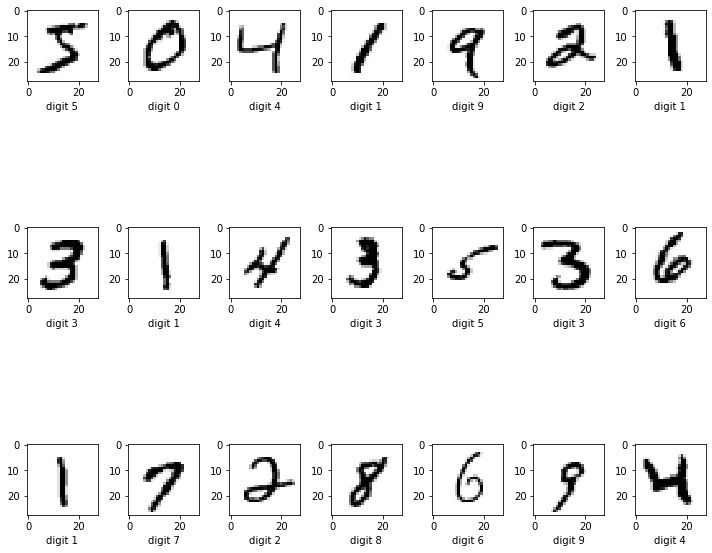

In [12]:
plt.figure(figsize=(10,10))

for i in range(0, 21):
    plt.subplot(3,7,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary, interpolation='nearest')
    plt.xlabel(f'digit {y_train[i]}')

plt.tight_layout()
plt.show()

In [115]:
def digitShow(data, digit, figsize_x, figsize_y, max_range, num_of_digit, plot_h, plot_w):
  plt.figure(figsize=(figsize_x, figsize_y))
  count = 0
  times = 0
  for i in range(0, max_range):
    if times < num_of_digit:
      if data.y[i] == digit:
        plt.subplot(plot_h, plot_w, count+1)
        count = count + 1
        times = times + 1
        pixel = np.array(data.iloc[i, :784]).reshape(28, 28)
        plt.imshow(pixel, cmap=plt.cm.binary, interpolation='nearest')

  plt.show()

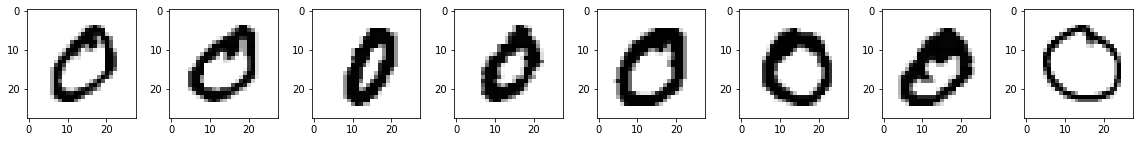

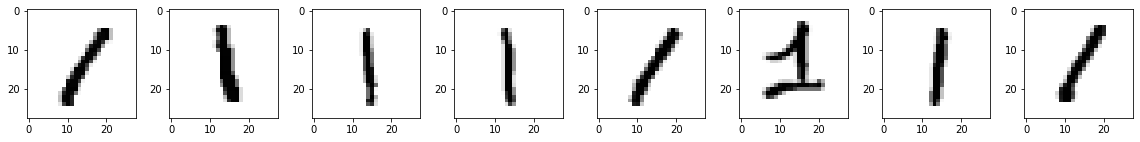

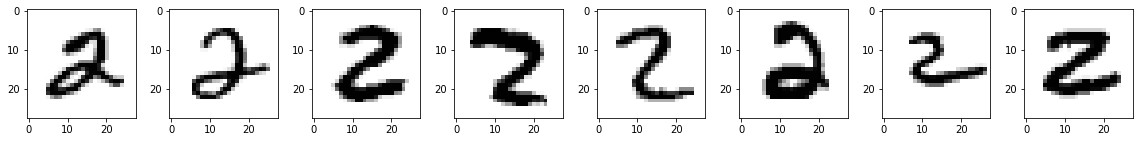

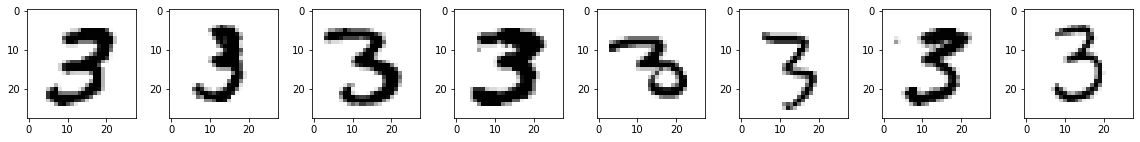

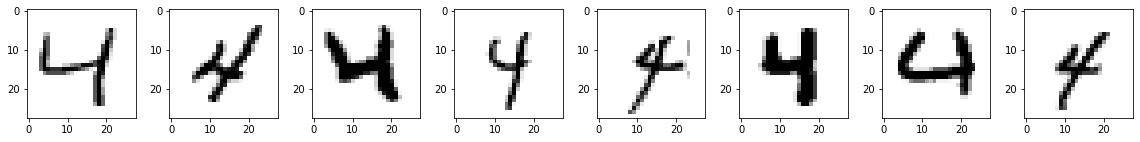

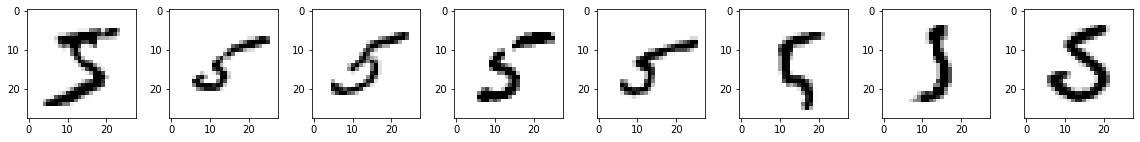

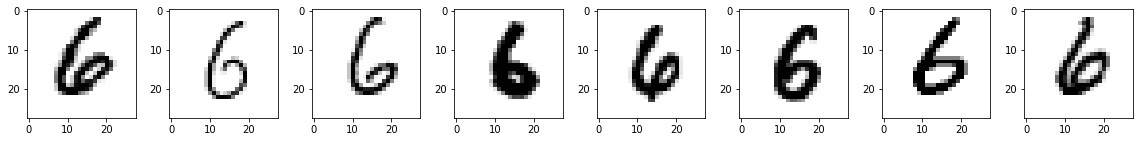

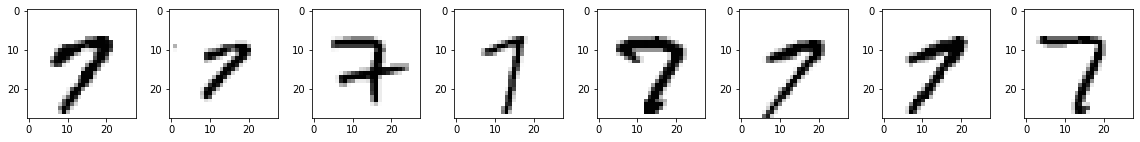

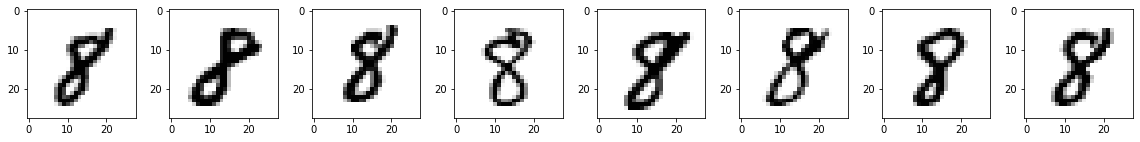

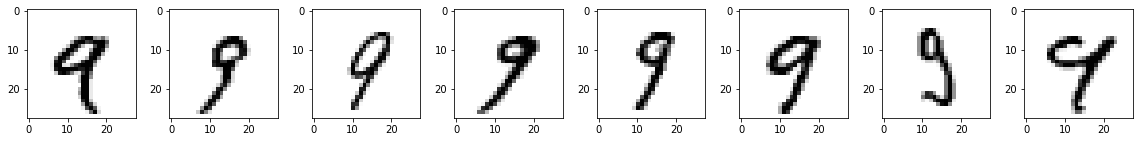

In [116]:
for digit in range(0, 10):
  digitShow(df_train, digit, 20, 2, 500, 8, 1, 8)

#### Check on digit 4 and 9

**Check on digit 4**

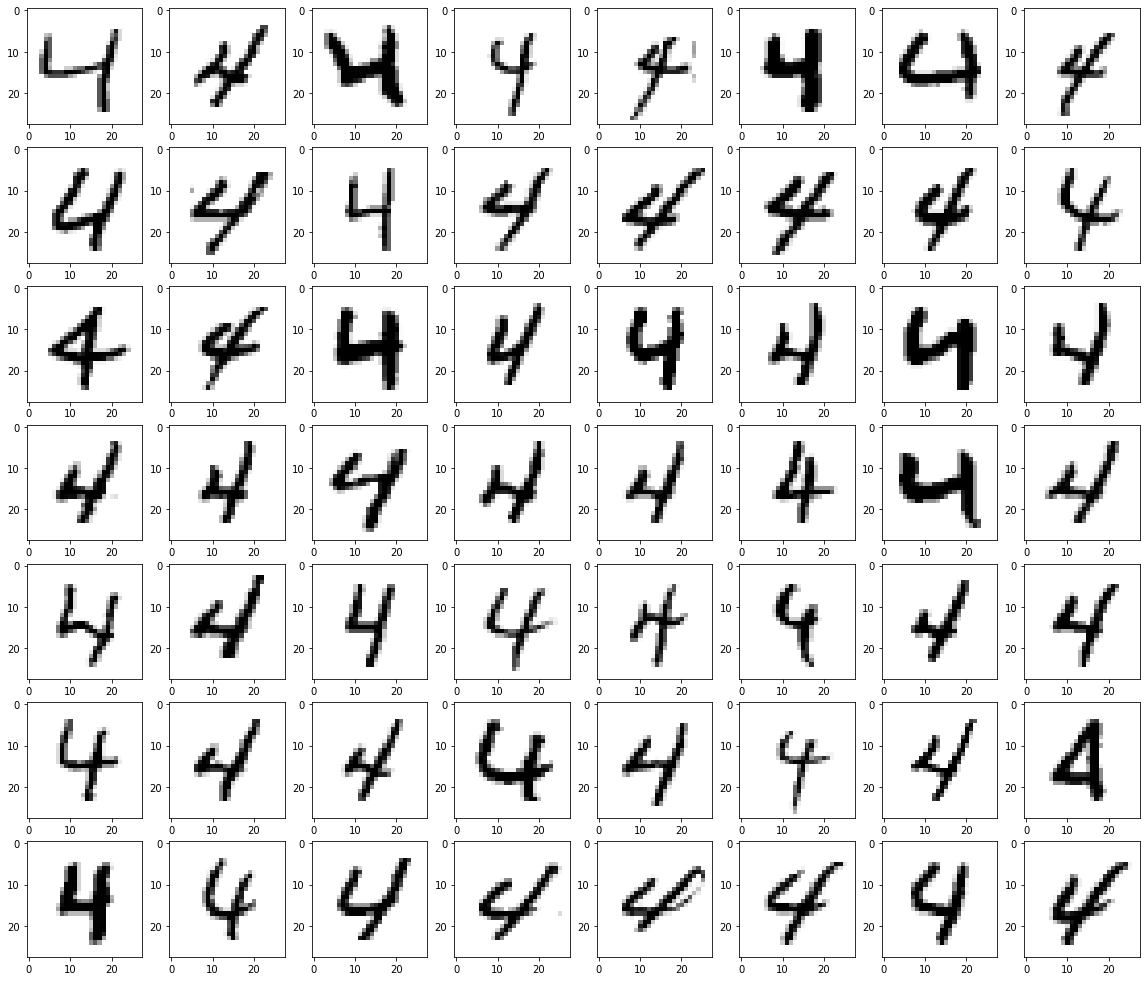

In [118]:
digitShow(df_train, 4, 20, 20, 600, 56, 8, 8)

**Here we can see some 4 are like 'open four' and 'close four'. We also can see some 4 looks atypical.**

**Check on digit 9**

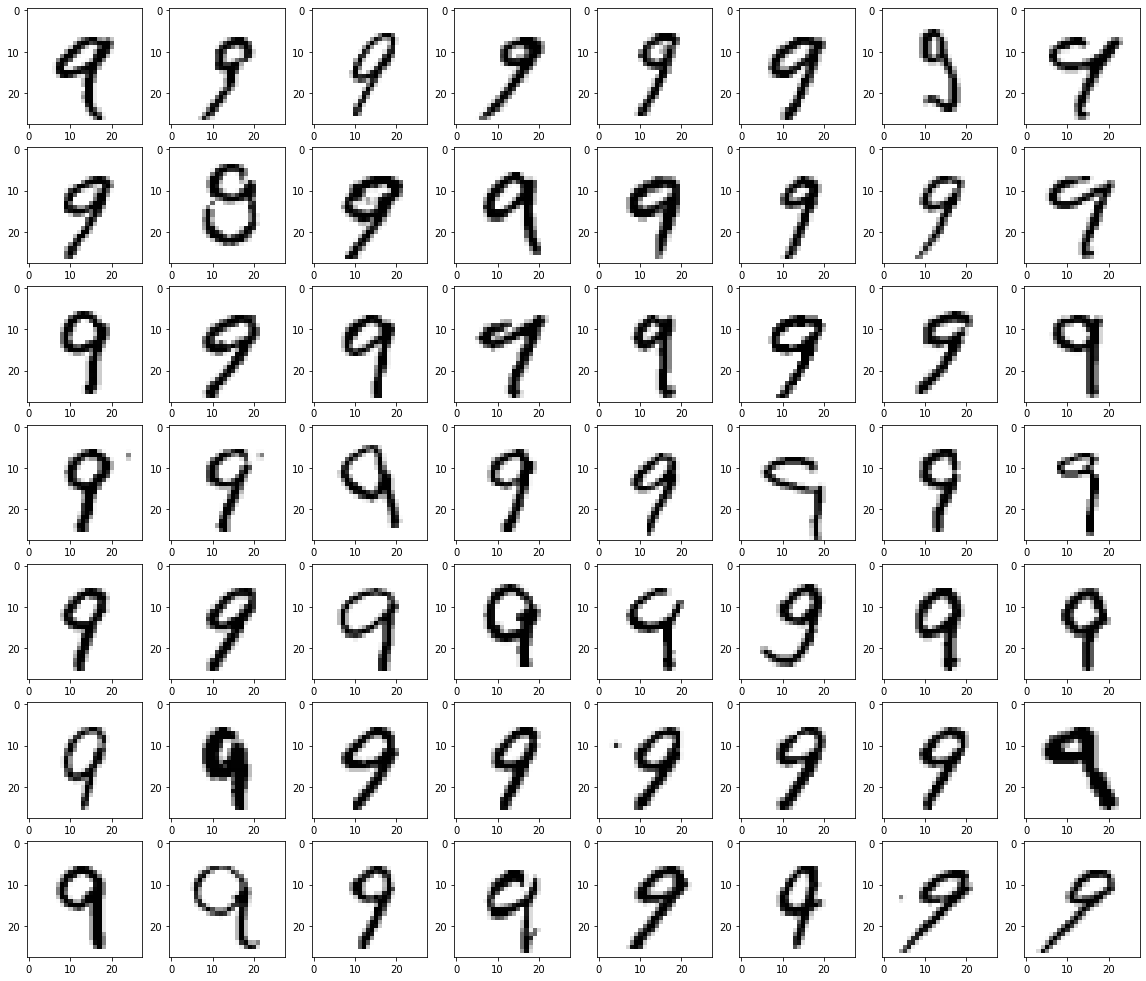

In [119]:
digitShow(df_train, 9, 20, 20, 600, 56, 8, 8)

**Here we can see some 9 looks like 'open 4' and some are atypical**

#### Check on digit 3 and 8

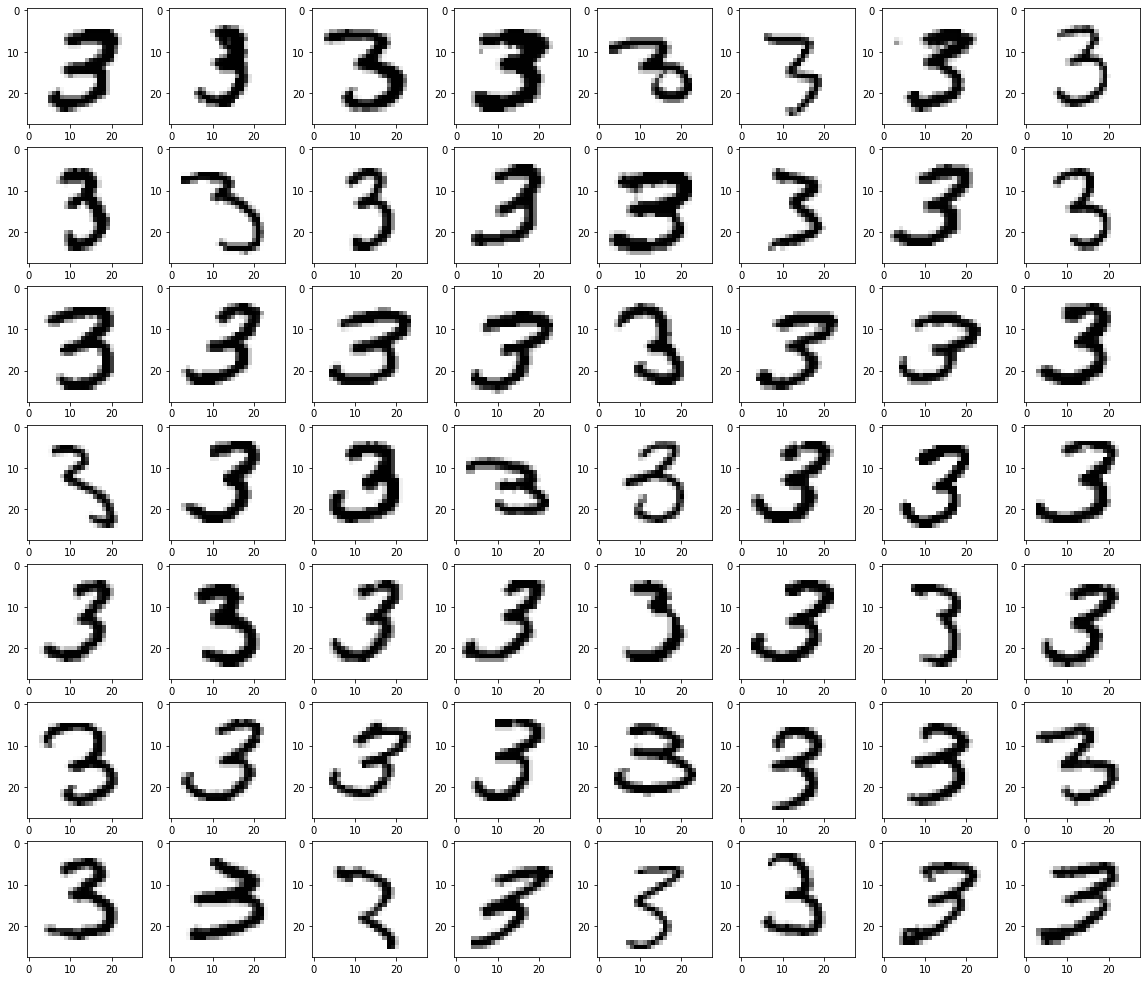

In [120]:
digitShow(df_train, 3, 20, 20, 600, 56, 8, 8)

**Here some 3 make overlap with 8 and some are least typical**

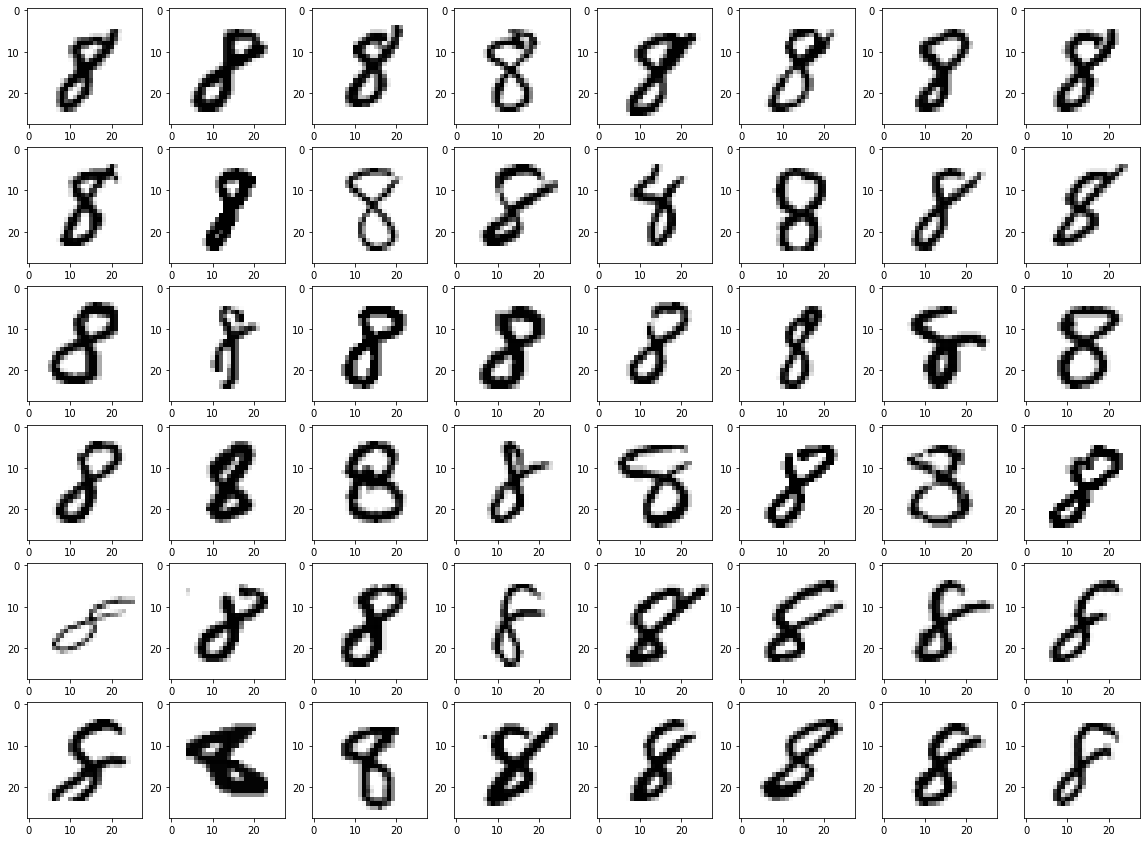

In [121]:
digitShow(df_train, 8, 20, 20, 600, 48, 8, 8)

**Here some 8 are least typical.**

In [16]:
df_train = DataFrame(x_train.reshape(60000, 784))
df_train['y'] = DataFrame(y_train)
df_train.y.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: y, dtype: int64

In [17]:
df_train.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,y
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to y
dtypes: uint8(785)
memory usage: 44.9 MB


In [19]:
len(df_train)

60000

Check for missing value

In [20]:
for i in df_train:
  if df_train[i].isnull().sum() == 0:
    if i == 'y':
      print('No missing value found')
    continue
  else:
    print(f'Found missing value on {i}')


No missing value found


In [21]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,y
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0,60000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002100,0.007833,0.003600,0.000150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000267,0.000917,0.009283,0.024283,0.043717,0.06410,0.120133,0.160733,...,2.591817,1.701167,1.008600,0.540283,0.238400,0.075267,0.016167,0.000517,0.000983,0.0,0.0,0.0,0.0,0.0,0.0,0.002533,0.015583,0.041633,0.089200,0.128217,0.196733,0.336017,0.429967,0.525983,0.590683,0.688033,0.592067,0.482733,0.343517,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0,4.453933
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475324,1.361189,0.881816,0.036742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065320,0.194636,1.055011,2.095113,2.962063,3.32388,4.869298,5.529033,...,22.251302,18.107058,13.897102,10.317854,6.552565,3.500306,1.241759,0.114964,0.240866,0.0,0.0,0.0,0.0,0.0,0.0,0.437527,1.721198,2.601220,4.032627,4.776047,6.177880,7.680724,9.093559,9.898373,10.431982,11.403013,10.517303,9.397896,8.057733,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0,2.889270
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000

**Distribution of the digits in the dataset**

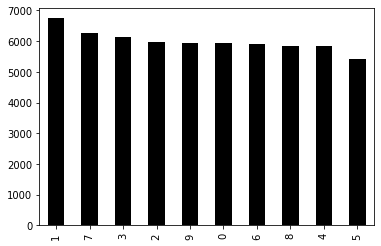

In [22]:
df_train.y.value_counts().plot(kind='bar', color='black')
plt.show()

### Histogram of each digit

In [122]:
def histogramOf(data, n, ntimes):
  plt.figure(figsize=(15,10))
  count = 0
  times = 0
  for i in range(0, len(data)):
    if times < ntimes:
      if y_train[i]==n:
        plt.subplot(3, 3, count+1)
        count = count + 1
        times = times + 1
        plt.hist(df_train.iloc[i, :784], color='black')
        plt.legend(f'{y_train[i]}')

  plt.tight_layout()
  plt.show()

**Take first three for each digit**

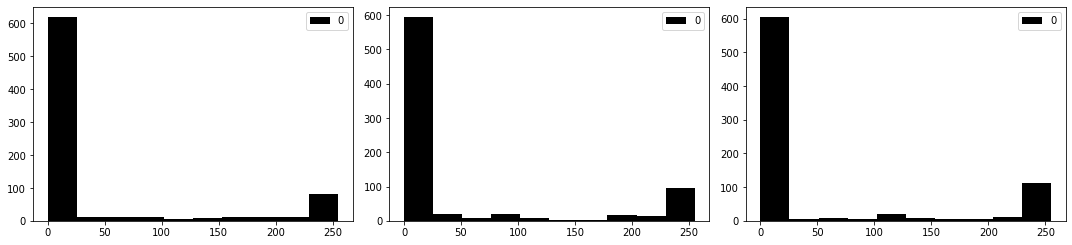

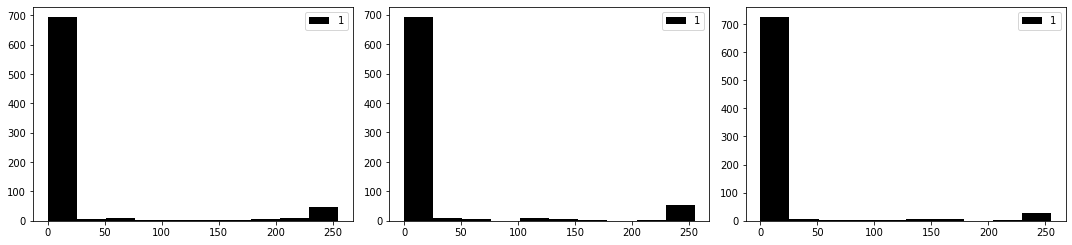

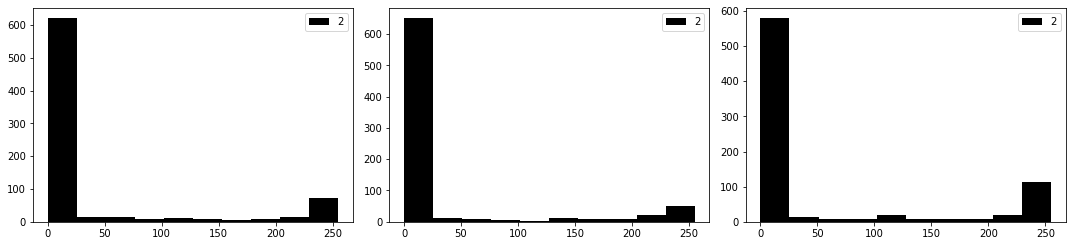

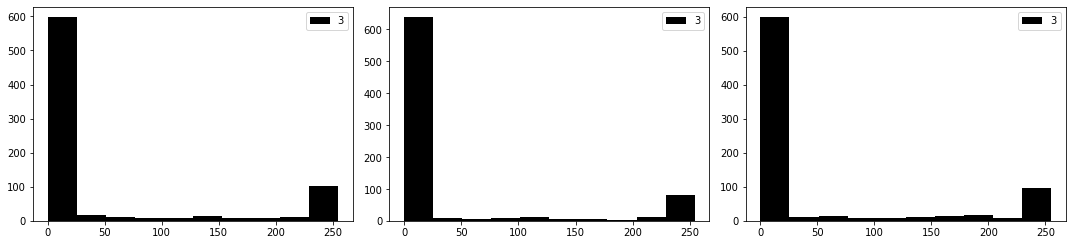

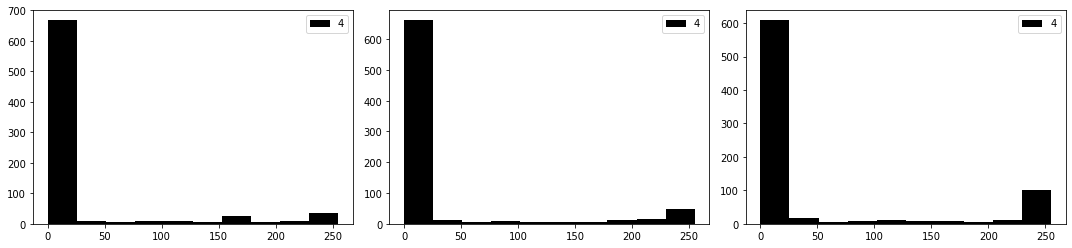

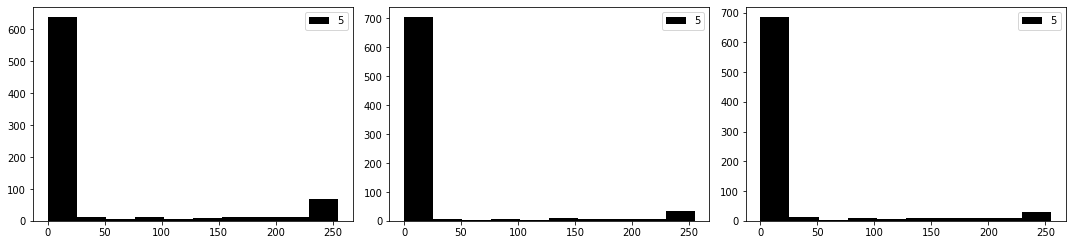

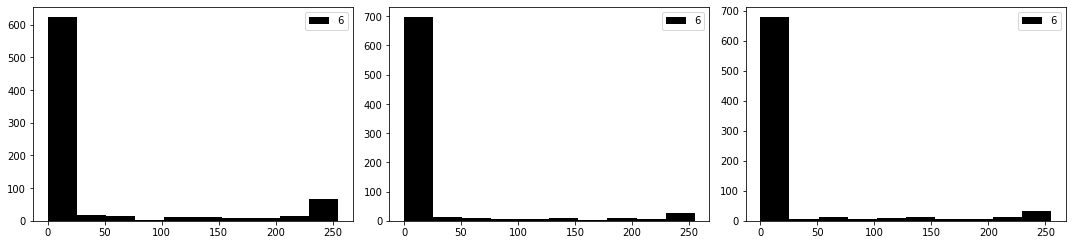

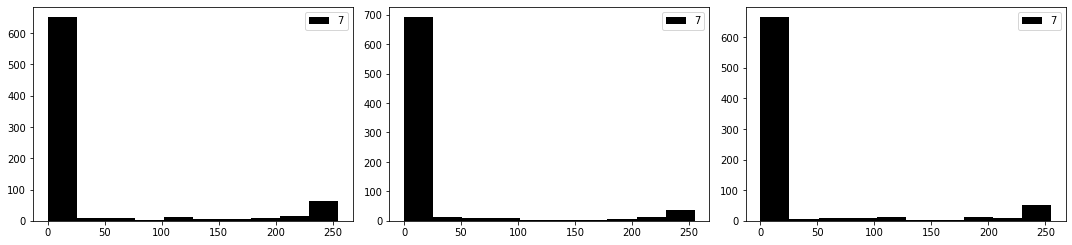

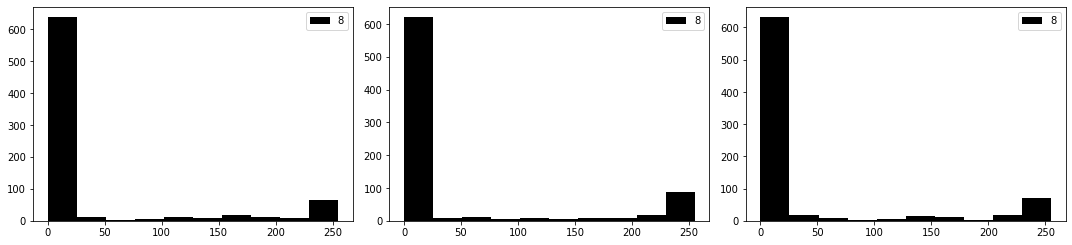

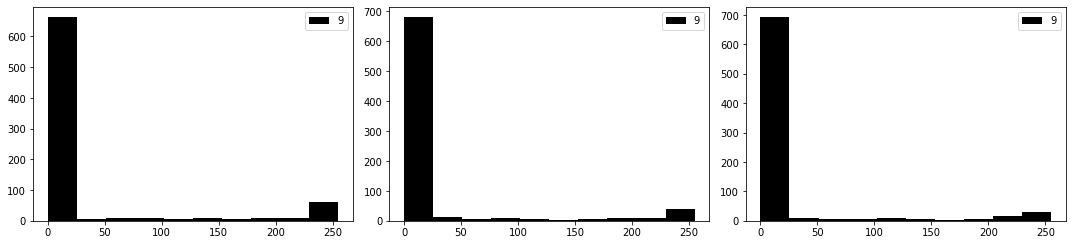

In [123]:
for digit in range(0, 10):
  histogramOf(df_train, digit, 3)

### Centroid
**Check where maximum value of pixels allocated on each digit**

**Take the average each pixel for each digit and take a look the centroid.**

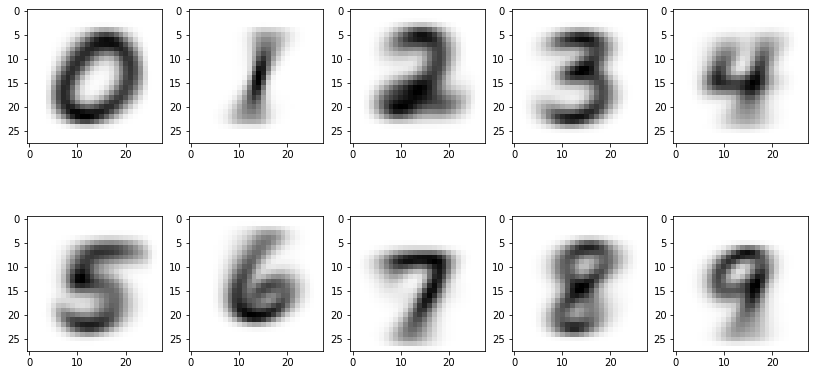

In [132]:
plt.figure(figsize=(14,7))

for i in range(0, 10):
    plt.subplot(2,5,i+1)
    digit = np.array(df_train[df_train.y==i].iloc[:,:784].mean())
    plt.imshow(digit.reshape(28, 28), cmap=plt.cm.binary, interpolation='nearest')

plt.show()

**The intuition tells where the centroid falls for each digit.**

**If we look on digit 1, sometimes people tilt it right or left and sometimes they write it vertically.**

### Intensity of each digits
**intensity is the average value of total pixel of an image for the different digits.**

In [133]:
def intensity_of_digit(data):
  intensity = np.empty(len(data))
  for i in range(0, len(data)):
    intensity[i] = df_train.iloc[i,:-1].mean()
  return intensity

In [134]:
intensity = intensity_of_digit(df_train)

In [135]:
intensity

array([35.10841837, 39.6619898 , 24.7997449 , ..., 28.22959184,
       26.05612245, 26.68367347])

In [136]:
df_train['intensity'] = intensity

In [137]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,y,intensity
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,35.108418
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39.661990
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,24.799745
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21.855867
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,29.609694


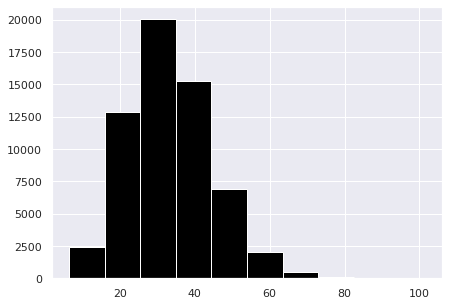

In [158]:
sns.set(rc = {'figure.figsize':(7,5)})
plt.hist(df_train.intensity, color='black')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


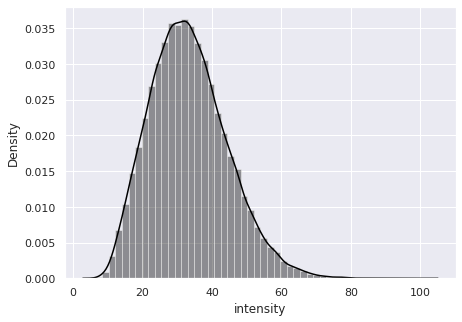

In [159]:
sns.set(rc = {'figure.figsize':(7,5)})
sns.distplot(df_train.intensity, color='black')
plt.show()

**Average intensity of each digits**

In [141]:
avg_ints = np.empty(10)
for i in range(0, 10):
  avg_ints[i] = df_train[df_train.y==i].intensity.mean()
print(avg_ints)

[44.21682791 19.37965385 37.98865785 36.09018654 30.94822568 32.83109548
 35.01195268 29.20456293 38.28977538 31.26043543]


In [142]:
print('Intensity')
for i, j in zip(range(0, 10), avg_ints):
  print(f'digit {i}: {j}')

Intensity
digit 0: 44.21682790539819
digit 1: 19.379653852789975
digit 2: 37.988657849846994
digit 3: 36.09018653946651
digit 4: 30.948225682775742
digit 5: 32.83109548467981
digit 6: 35.011952681545736
digit 7: 29.20456292652735
digit 8: 38.28977538289272
digit 9: 31.260435427322722


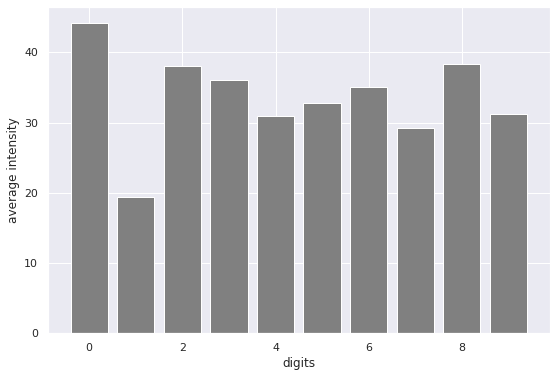

In [153]:
sns.set(rc = {'figure.figsize':(9,6)})
plt.bar(np.arange(0, 10), avg_ints, color='gray')
plt.xlabel('digits')
plt.ylabel('average intensity')
plt.show()

**Some differences we can observe in intensity. The digit “1” has less intense while the digit “0” has most intense.**

### Intensity distribution for each digit

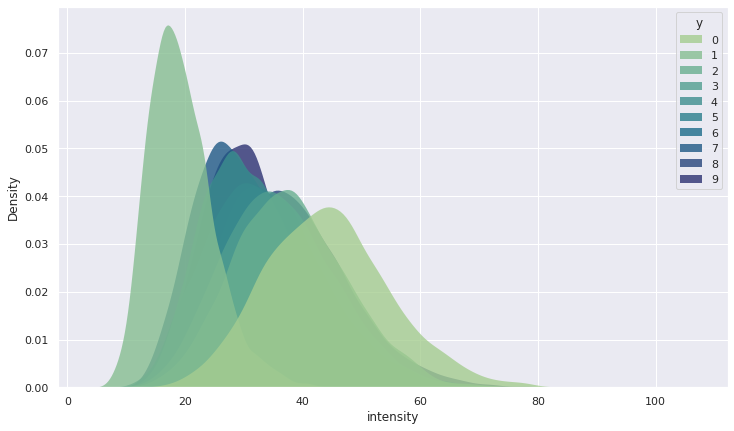

In [146]:
sns.set(rc = {'figure.figsize':(12,7)})
sns.kdeplot(data=df_train, x=df_train.intensity, hue='y', fill=True, common_norm=False, palette="crest", alpha=.8, linewidth=0)
plt.show()

**Check distribution seperately**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

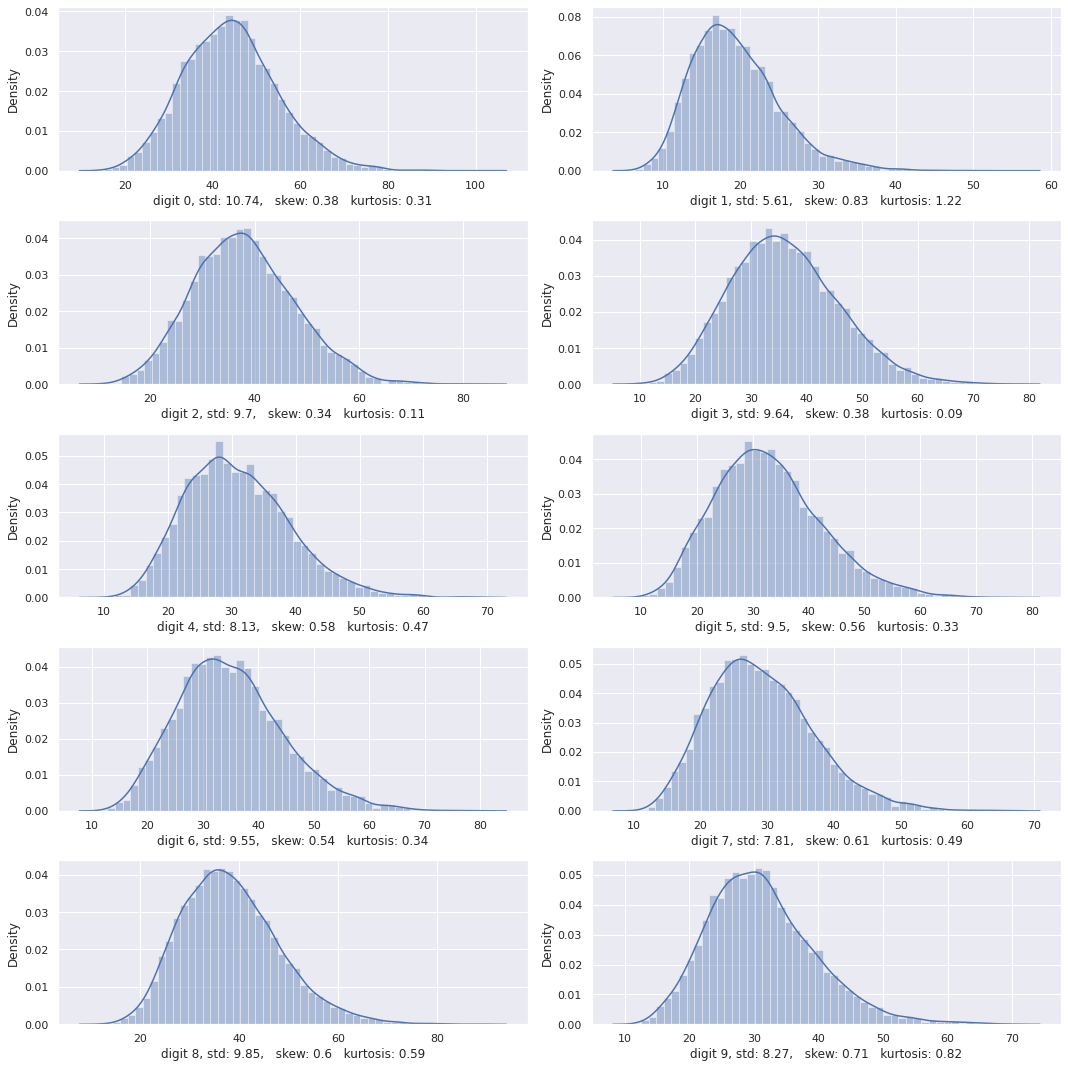

In [144]:
sns.set(rc = {'figure.figsize':(15,15)})
for i in range(0, 10):
  plt.subplot(5,2,i+1)
  sns.distplot(df_train[df_train.y==i].intensity)
  plt.xlabel(f'digit {i}, std: {round(df_train[df_train.y==i].intensity.std(), 2)}, \
  skew: {round(stats.skew(df_train[df_train.y==i].intensity), 2)} \
  kurtosis: {round(stats.kurtosis(df_train[df_train.y==i].intensity), 2)}')
plt.tight_layout()
plt.show()

**Intuition tells us the digit “1” has on average less intensity than other digits and 0 has much more variablity than other digits.**

**All distributions seem roughly normally distributed and some have higher variance than others.**